# Robustness and Plasticity in Regulatory Networks

* [Introduction](./RPRN-Introduction.ipynb)
* [BoolNet](#BoolNet)
    * [Network construction](#Network-construction)
    * [Attractors](#Attractors)
    * [Labels](#Labels)
* [Functions](./RPRN-Functions.ipynb)
* [Updating](./RPRN-Updating.ipynb)
* [States and trajectories](./RPRN-States-Trajectories.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)

# BoolNet

Once a regulatory network has been constructed there exist [multiple tools](http://www.colomoto.org/software/) to analyse it. In this tutorial we will focus in the R package [Boolnet](https://cran.r-project.org/web/packages/BoolNet/index.html).

It is possible to combine the different software tools to make a better analysis, the standar format for saving a logical regulatory network is [SBML-qual](http://www.colomoto.org/formats/sbml-qual.html) (see the [Appendix](./RPRN-Appendix.ipynb) for more information).

Sometimes it is useful to [simplify the network](http://ginsim.org/ginsim-doc/current/algo-reduction.html). 

## Network construction

The interactions of a biological system can be expressed as a set of logical functions using multiple formalisms ([Boolean functions](https://en.wikipedia.org/wiki/Boolean_function), [truth tables](https://en.wikipedia.org/wiki/Truth_table), [Binary Decision Diagrams](https://en.wikipedia.org/wiki/Binary_decision_diagram)). BoolNet accepts a set of boolean functions.

For examplet the Th17/iTreg network can be expressed as a set of boolean functions obtained from the known interactions among the cytokines and transcription factors.

>targets, functions

>IL2, (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))

>RORGT, (STAT3 & TGFB) &  ! FOXP3

>STAT3, (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)

>FOXP3, (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)

>TGFB, TGFBe | ((TGFB | FOXP3) &  ! STAT3 )

>IL10, IL10e | (IL10 & (STAT3 | TGFB))

First, we will load BoolNet

In [1]:
#Uncomment next line if you haven't installed BoolNet
#install.packages("BoolNet", repos='http://cran.us.r-project.org')
library(BoolNet)
library(BoolNetPerturb)

Boolnet creates a network object with the function __loadNetwork()__. This function accepts the filename of the file with the rules. In this case we will create the file from the notebook.

In [2]:
fileConn<-file("minTh17iTreg.txt")
writeLines(c(
    "targets, functions",
    "IL2, (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))",
    "RORGT, (STAT3 & TGFB) &  ! FOXP3",
    "STAT3, (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)",
    "FOXP3, (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)",
    "TGFB, TGFBe | ((TGFB | FOXP3) &  ! STAT3 )",
    "IL10, IL10e | (IL10 & (STAT3 | TGFB))", 
    "IL2e, IL2e",
    "IL21e, IL21e",
    "TGFBe, TGFBe",
    "IL10e, IL10e"
    ), fileConn)
close(fileConn)

Now we can create a network object. If you don't specify a node BoolNet will raise a warning and asumme it is an input. The resulting network should have ten nodes.

In [3]:
net <- loadNetwork("minTh17iTreg.txt")
net

Boolean network with 10 genes

Involved genes:
IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Transition functions:
IL2 = (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))
RORGT = (STAT3 & TGFB) &  ! FOXP3
STAT3 = (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)
FOXP3 = (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)
TGFB = TGFBe | ((TGFB | FOXP3) &  ! STAT3 )
IL10 = IL10e | (IL10 & (STAT3 | TGFB))
IL2e = IL2e
IL21e = IL21e
TGFBe = TGFBe
IL10e = IL10e

The result is a network object. This object structure is:
* __network__
    * __\$interactions__ : list of nodes where each node has its functions represented as truth tables. (Use iterator or [[n]] to examine each node)
        * __\$input__ : index of regulators
        * __\$func__ : function as truth table
        * __\$expression__ : Boolean function as string
    * __\$genes__ : ordered node names
    * __\$fixed__ : which nodes have fixed values (see [Functions](./RPRN-Functions.ipynb))

In [4]:
net$interactions[[1]]
net$genes
net$fixed

$input
[1] 1 3 4 6 7

$func
 [1] 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0

$expression
[1] "(IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))"


[1] "IL2"   "RORGT" "STAT3" "FOXP3" "TGFB"  "IL10"  "IL2e"  "IL21e" "TGFBe"
[10] "IL10e"

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
   -1    -1    -1    -1    -1    -1    -1    -1    -1    -1

The Th17/iTreg regulatory network can also be found in the `BoolNetPerturb` data.

In [5]:
data(netTh17iTreg)
netTh17iTreg

Boolean network with 10 genes

Involved genes:
IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Transition functions:
IL2 = (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))
RORGT = (STAT3 & TGFB) &  ! FOXP3
STAT3 = (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)
FOXP3 = (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)
TGFB = TGFBe | ((TGFB | FOXP3) &  ! STAT3 )
IL10 = IL10e | (IL10 & (STAT3 | TGFB))
IL2e = IL2e
IL21e = IL21e
TGFBe = TGFBe
IL10e = IL10e

## Attractors

[//]: # (As the state of the network is updated using the functions, the network will reach a previously visited state called an attractor. The set of states that lead to an attractor is called the basin of the attractor [Fig1 C] \cite{Gerherson2004}.)

Attractors represent stable states in the dynamics of the network and have been related to cell types or  biological processes like the cell cycle. 

The number of possible states and the complexity of finding the attractors grows exponentially with the number of nodes. It is possible efficiently find the stable states [without simulations](http://ginsim.org/documentation) and using [model checking](http://dl.acm.org/citation.cfm?id=2014689). 

The attractors we obtain can be affected by the [updating method](./RPRN-Updating.ipynb) (synchronus or asynchronous).

BoolNet uses the function __getAttractors()__ to obtain the attractors of the network. This function has a lot of options that can be checked in the documentation.

In [6]:
?getAttractors

getAttractors {BoolNet},R Documentation
network,"A network structure of class BooleanNetwork or SymbolicBooleanNetwork. These networks can be read from files by loadNetwork, generated by generateRandomNKNetwork, or reconstructed by reconstructNetwork."
type,"If type=""synchronous"", synchronous state transitions are used, i.e. all genes are updated at the same time. Synchronous attractor search can be performed in an exhaustive manner or using a heuristic that starts from predefined states. For symbolic networks, only synchronous updates are possible. If type=""asynchronous"", asynchronous state transitions are performed, i.e. one (randomly chosen) gene is updated in each transition. Steady-state attractors are the same in asynchronous and synchronous networks, but the asynchronous search is also able to identify complex/loose attractors. Asynchronous search relies on a heuristic algorithm that starts from predefined states. See Details for more information on the algorithms."
method,"The search method to be used. If ""exhaustive"", attractors are identified by exhaustive state space search, i.e. by calculating the sucessors of all 2^n states (where n is the number of genes that are not set to a fixed value). This kind of search is only available for synchronous attractor search, and the maximum number of genes allowed for exhaustive search is 29. Apart from the attractors, this method generates the full state transition graph. If method is ""sat.exhaustive"" or ""sat.restricted"", attractors are identified using algorithms based on the satisfiability problem. This search type is also restricted to synchronous networks. It can be used to identify attractors in much larger networks than with method=""exhaustive"", but does not return the state transition graph. For method=""sat.exhaustive"", an exhaustive attractor search is performed, while method=""sat.restricted"" only searches for attractors of a specified maximum length maxAttractorLength. If method is ""random"", startStates is interpreted as an integer value specifying the number of states to be generated randomly. The algorithm is then initialized with these random states and identifies the attractors to which these states lead. If method is ""chosen"", startStates is interpreted as a list of binary vectors, each specifying one input state. Each vector must have length(network$genes) elements with 0 or 1 values. The algorithm identifies the attractors to which the supplied states lead. If network is of class SymbolicBooleanNetwork and makes use of more than one predecessor state, this can also be a list of matrices with the genes in the columns and multiple predecessor states in the rows. If method is not supplied, the desired method is inferred from the type of startStates. By default, if neither method nor startStates are provided, an exhaustive search is performed."
startStates,The value of startStates depends on the chosen method. See method for more details.
genesON,"A vector of genes whose values are fixed to 1, which reduces the complexity of the search. This is equivalent to a preceding call of fixGenes."
genesOFF,"A vector of genes whose values are fixed to 0, which reduces the complexity of the search. This is equivalent to a preceding call of fixGenes."
canonical,"If set to true, the states in the attractors are rearranged such that the state whose binary encoding makes up the smallest number is the first element of the vector. This ensures that attractors found by different heuristic runs of getAttractors are comparable, as the cycles may have been entered at different states in different runs of the algorithm."
randomChainLength,"If type=""asynchronous"", this parameter specifies the number of random transitions performed by the search to enter a potential attractor (see Details). Defaults to 10000."
avoidSelfLoops,"If type=""asynchronous"" and avoidSelfLoops=TRUE, the asynchronous attractor search only enters self loops (i.e. transitions that result in the

Here, we will use the default options

In [7]:
attr <- getAttractors(net)
attr

Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 27 state(s):

 |--<---------|
 V            |
 0000000000   |
 V            |
 |-->---------|


Genes are encoded in the following order: IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 2 state(s):

 |--<---------|
 V            |
 1000000000   |
 V            |
 |-->---------|


Genes are encoded in the following order: IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Attractor 3 is a simple attractor consisting of 1 state(s) and has a basin of 14 state(s):

 |--<---------|
 V            |
 0010000000   |
 V            |
 |-->---------|


Genes are encoded in the following order: IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Attractor 4 is a simple attractor consisting of 1 state(s) and has a basin of 13 state(s):

 |--<---------|
 V            |
 0000100000   |
 V            |
 |-->---------|


Genes are e

The result is an attractor object. States are saved as an integer. This object structure can change depending of the options used. The general structure is:
* __attractor__
    * __\$stateInfo__ : information of the simulation, evaluated states and transition table
        * __\$table__,  __\$attractorAssignment__,  __\$stepsToAttractor__,  __\$initialStates__,  __\$genes__,  __\$fixedGenes__,  
    * __\attractors$__ : list of attractors. (Use iterator or [[n]] to examine each node)
        * __\$involvedStates__ : states that make the attractor
        * __\$basinSize__ : states that reach the attractor

In [8]:
attr$attractors[[58]]

$involvedStates
     [,1] [,2]
[1,] 1009 1016

$basinSize
[1] 12


We can plot them using __plotAttractors()__

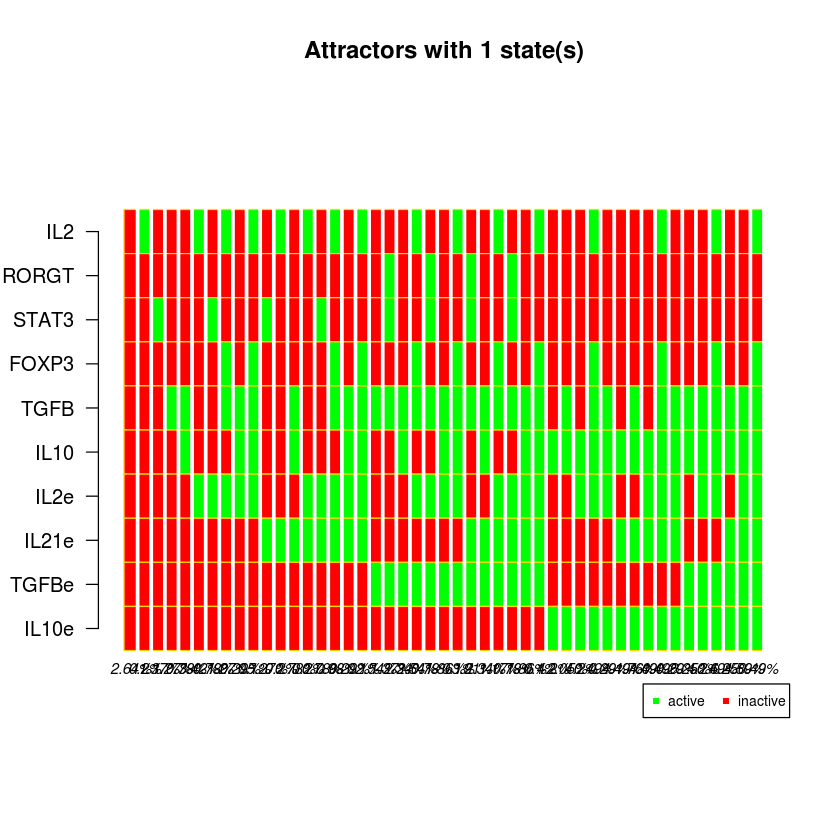

,Attr1.1,Attr2.1,Attr3.1,Attr4.1,Attr5.1,Attr6.1,Attr7.1,Attr8.1,Attr9.1,Attr10.1,,Attr38.1,Attr39.1,Attr40.1,Attr41.1,Attr42.1,Attr43.1,Attr44.1,Attr45.1,Attr46.1,Attr47.1
IL2,0,1,0,0,0,1,0,1,0,1,⋯,0,0,1,0,0,0,1,0,0,1
RORGT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
STAT3,0,0,1,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FOXP3,0,0,0,0,0,0,0,1,0,1,⋯,0,0,1,0,0,0,1,0,0,1
TGFB,0,0,0,1,1,0,0,1,1,1,⋯,1,0,1,1,1,1,1,1,1,1
IL10,0,0,0,0,1,0,0,0,1,1,⋯,1,1,1,1,1,1,1,1,1,1
IL2e,0,0,0,0,0,1,1,1,1,1,⋯,0,1,1,1,0,1,1,0,1,1
IL21e,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,0,0,0,1,1,1
TGFBe,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,1,1,1,1,1
IL10e,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1


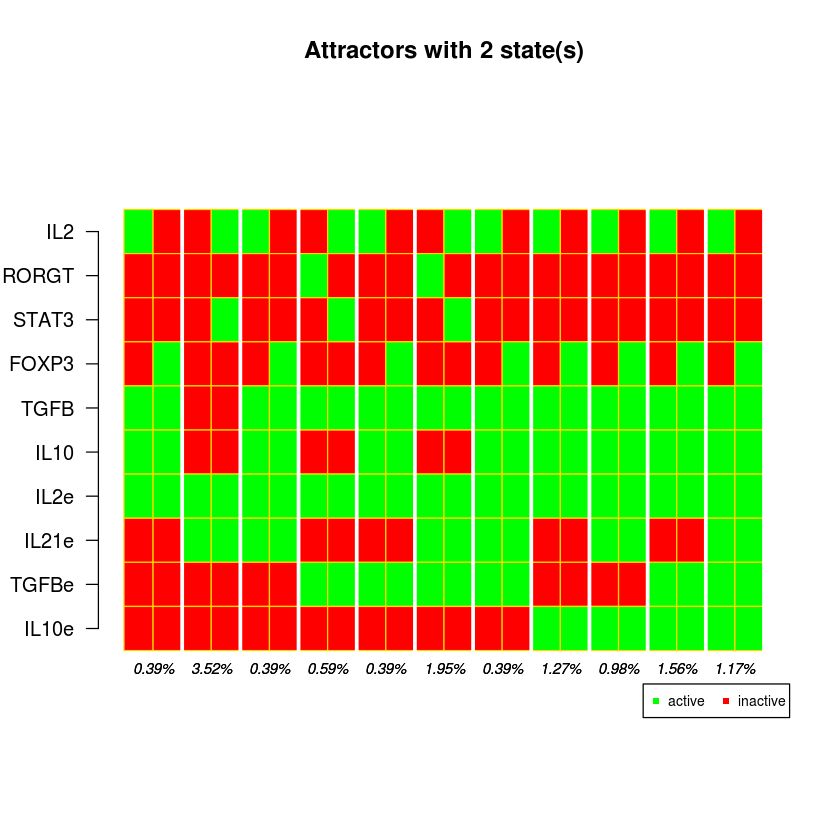

In [9]:
plotAttractors(attr)

We can create a dataframe including only the state and the basin size. However, there are some attractors that have more than one state, which can complicate the process. To solve this we will use the function __attractor2dataframe()__ that transforms the attractors to dataframes. As we can have cyclic states this function will convert the to characters and join them with "\".

In [10]:
attr.df <- attractor2dataframe(attr) 
attr.df

,involvedStates,basinSize
1,0,27
2,1,2
3,4,14
4,16,13
5,48,8
6,65,35
7,68,8
8,89,13
9,112,3
10,121,1


It would also be useful to have the attractors in 0s and 1s format and know the gene names. Lets make a function for this

In [11]:
int2binState <- function(x, genes){ 
    state <- as.integer( intToBits(x)[1:length(genes)] )  
    names(state) <- genes
    state
    }

Using this function we can analyze the active nodes in a state. For example, the attractor 58:

In [12]:
bin.states <- lapply (attr$attractors[[58]]$involvedStates, 
                      int2binState, net$genes)
bin.states

[[1]]
  IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    1     0     0     0     1     1     1     1     1     1 

[[2]]
  IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    0     0     0     1     1     1     1     1     1     1

## Labels

Attractors correspond to cell types. It is very important to verify that all the expected cell types appear in our attractors, if they are not present we might be missing interactions. It is also important to see if there are attractors that do not correspond to known cell types, as they may be predictions or show errors in the construction of the network.

However, when there are a lot of inputs, it is possible that many attractors correspond to a single cell type that can be found in different environments (we will discuss this further). To solve this problem we will label our attractors according to a set of rules.

In the case of the Th17/iTreg network this rules are:

>labels,  rules

>Th0,   ! (RORGT | FOXP3 | TGFB | IL10)

>Th17,  RORgt & STAT3

>iTreg, FOXP3 & TGFB

>IL10+, IL10 & ! (RORGT | FOXP3 | TGFB)

>TGFB+, TGFB & ! (RORGT | FOXP3 | TGFB)

>IL10+TGFB+, (TGFB & IL10) & ! (RORGT | FOXP3)

This rules for labelling can be found in the `BoolNetPerturb` data:

In [13]:
data(labelsRulesTh17iTreg)
labels.rules <- labelsRulesTh17iTreg
labels.rules

,labels,rules
1,Th0,!(RORGT | FOXP3 | TGFB | IL10)
2,Th17,RORGT & STAT3
3,Treg,FOXP3 & TGFB
4,IL10+,IL10
5,TGFB+,TGFB & ! (RORGT | FOXP3)
6,RORGT+,RORGT & ! STAT3


For each rule we can write a function that evaluates  the nodes. For example, for the rule __Th0__ we could write the following rule:

In [14]:
ruleTh0 <- function(
    IL2, RORGT, STAT3, FOXP3, TGFB, IL10, IL2e, IL21e, TGFBe, IL10e
    ) { 
    if (!(RORGT | FOXP3 | TGFB | IL10)) 'Th0' 
}

We can use this function with a binary state. For examplem the state 0 (0,0,0,0,0,0,0,0,0,0) has the label "Th0", but the state 121 (1,0,0,1,1,1,1,,0,0,0) does not.

In [15]:
label <- ruleTh0(0,0,0,0,0,0,0,0,0,0)
label
state <- ruleTh0(1,0,0,1,1,1,1,0,0,0)
state

[1] "Th0"

NULL

We can also give the function a list of named arguments using __do.call()__, this way the function can receive the state obtained from __int2binState()__.

In [16]:
state <- attr$attractors[[1]]$involvedStates
state <- int2binState(state, net$genes)
#state
label <- do.call(ruleTh0, as.list(state))
label

[1] "Th0"

While we could create specific functions for each labeling rule, it is better to make a general function that can interpret our rules. 
The function __labelState()__ takes a binary state with gene names, a set of labels and the rules as strings and returns a label.

In [17]:
state <- int2binState(121, net$genes)
#state
label <- labelState(state, net$genes, labels.rules$labels, labels.rules$rules)
label

[1] "TregIL10+"

Using this method it is possible to label all the states involved in an attractor. The function __labelAttractors()__ takes an attractors object created by BoolNet and returns a list of the labels for each attractor in order. If an attractor has multiple states it will return a label for each state.

Lets obtain the labels of all the attractors using the function __labelAttractors()__.

In [18]:
labels <- labelAttractors(attr, net$genes, labels.rules$labels, labels.rules$rules)
labels

[[1]]
[1] "Th0"

[[2]]
[1] "Th0"

[[3]]
[1] "Th0"

[[4]]
[1] "TGFB+"

[[5]]
[1] "IL10+TGFB+"

[[6]]
[1] "Th0"

[[7]]
[1] "Th0"

[[8]]
[1] "Treg"

[[9]]
[1] "IL10+TGFB+"

[[10]]
[1] "TregIL10+"

[[11]]
[1] "Th0"

[[12]]
[1] "Th0"

[[13]]
[1] "IL10+TGFB+"

[[14]]
[1] "Th0"

[[15]]
[1] "Th0"

[[16]]
[1] "Treg"

[[17]]
[1] "IL10+TGFB+"

[[18]]
[1] "TregIL10+"

[[19]]
[1] "TGFB+"

[[20]]
[1] "Th17"

[[21]]
[1] "IL10+TGFB+"

[[22]]
[1] "Treg"

[[23]]
[1] "Th17"

[[24]]
[1] "IL10+TGFB+"

[[25]]
[1] "TregIL10+"

[[26]]
[1] "Th17"

[[27]]
[1] "IL10+TGFB+"

[[28]]
[1] "Treg"

[[29]]
[1] "Th17"

[[30]]
[1] "IL10+TGFB+"

[[31]]
[1] "TregIL10+"

[[32]]
[1] "IL10+"

[[33]]
[1] "IL10+TGFB+"

[[34]]
[1] "IL10+"

[[35]]
[1] "TregIL10+"

[[36]]
[1] "IL10+TGFB+"

[[37]]
[1] "IL10+"

[[38]]
[1] "IL10+TGFB+"

[[39]]
[1] "IL10+"

[[40]]
[1] "TregIL10+"

[[41]]
[1] "IL10+TGFB+"

[[42]]
[1] "IL10+TGFB+"

[[43]]
[1] "IL10+TGFB+"

[[44]]
[1] "TregIL10+"

[[45]]
[1] "IL10+TGFB+"

[[46]]
[1] "IL10+TGFB+"

[[47]]
[1] "TregIL10+"

[[48]]
[1] "IL10+TGFB+" "TregIL10+" 

[[49]]
[1] "Th0" "Th0"

[[50]]
[1] "IL10+TGFB+" "TregIL10+" 

[[51]]
[1] "RORGT+" "TGFB+" 

[[52]]
[1] "IL10+TGFB+" "TregIL10+" 

[[53]]
[1] "RORGT+" "TGFB+" 

[[54]]
[1] "IL10+TGFB+" "TregIL10+" 

[[55]]
[1] "IL10+TGFB+" "TregIL10+" 

[[56]]
[1] "IL10+TGFB+" "TregIL10+" 

[[57]]
[1] "IL10+TGFB+" "TregIL10+" 

[[58]]
[1] "IL10+TGFB+" "TregIL10+"

We will add the labels to the dataframe we created with __attractor2dataframe()__. To do this we will need to join the labels of the attractors that have more than one state with "/".

In [19]:
attr.df$label <- sapply(labels, function(label) {
    paste(as.character(label), collapse='/')
})
attr.df


,involvedStates,basinSize,label
1,0,27,Th0
2,1,2,Th0
3,4,14,Th0
4,16,13,TGFB+
5,48,8,IL10+TGFB+
6,65,35,Th0
7,68,8,Th0
8,89,13,Treg
9,112,3,IL10+TGFB+
10,121,1,TregIL10+


As we can see some labels have more than one attractor. This is because some cell types can be found in different environments. We can see all the unique labels to determine if all the labels correspond to the expected cell types.

In [20]:
unique(attr.df$label)

[1] "Th0"                  "TGFB+"                "IL10+TGFB+"          
 [4] "Treg"                 "TregIL10+"            "Th17"                
 [7] "IL10+"                "IL10+TGFB+/TregIL10+" "Th0/Th0"             
[10] "RORGT+/TGFB+"

While we have all the expected cell types we have some cycles where one of the states could not be labeled. If we check the dataframe, the states 338 and 466 have no label, we can study them to see what happened.

In [21]:
state.odd.a1 <- int2binState(338, net$genes)
state.odd.a2 <- int2binState(341, net$genes)
state.odd.a1
state.odd.a2
state.odd.b1 <- int2binState(466, net$genes)
state.odd.b2 <- int2binState(469, net$genes)
state.odd.b1
state.odd.b2

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    0     1     0     0     1     0     1     0     1     0

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    1     0     1     0     1     0     1     0     1     0

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    0     1     0     0     1     0     1     1     1     0

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
    1     0     1     0     1     0     1     1     1     0

As we can see this states correspond to oscillations where ROR$\gamma$t can not stabilish a stable expression. If we use an asynchronous update this states will dissapear. 

We can create a new rule to include this states.
> RORGT+, RORGT & ! STAT3

In [22]:
labels.rules <- rbind(labels.rules, c('RORGT+', 'RORGT & ! STAT3'))
labels.rules

,labels,rules
1,Th0,!(RORGT | FOXP3 | TGFB | IL10)
2,Th17,RORGT & STAT3
3,Treg,FOXP3 & TGFB
4,IL10+,IL10
5,TGFB+,TGFB & ! (RORGT | FOXP3)
6,RORGT+,RORGT & ! STAT3
7,RORGT+,RORGT & ! STAT3


We will need to do the labeling and the dataframe once more.

In [23]:
labels <- labelAttractors(attr, net$genes, labels.rules$labels, labels.rules$rules)
labels <- sapply(labels, function(l) paste(as.character(l), collapse='/'))
attr.df$label <- labels
attr.df


,involvedStates,basinSize,label
1,0,27,Th0
2,1,2,Th0
3,4,14,Th0
4,16,13,TGFB+
5,48,8,IL10+TGFB+
6,65,35,Th0
7,68,8,Th0
8,89,13,Treg
9,112,3,IL10+TGFB+
10,121,1,TregIL10+


Now that all the states are labeled we can also determine which attractor states correspond to each label and the joint size of the basin of attraction of each label.

In [24]:
attractors.by.label <- data.frame(
    states = tapply(attr.df$involvedStates, attr.df$label, paste),
    basin = tapply(attr.df$basin, attr.df$label, sum)
)
attractors.by.label

,states,basin
IL10+,"544, 608, 672, 736",178
IL10+TGFB+,"48, 112, 176, 240, 304, 368, 432, 496, 560, 624, 688, 752, 816, 880, 944, 1008",371
IL10+TGFB+/TregIL10+,"113/120, 241/248, 369/376, 497/504, 625/632, 753/760, 881/888, 1009/1016",67
RORGT+RORGT+/TGFB+,"338/341, 466/469",26
TGFB+,"16, 272",39
Th0,"0, 1, 4, 65, 68, 132, 129, 193, 196",152
Th0/Th0,192/197,36
Th17,"278, 342, 406, 470",70
Treg,"89, 217, 345, 473",61
TregIL10+,"121, 249, 377, 505, 633, 761, 889, 1017",24


This ends the basic BoolNet tutorial.

# Next

* [Introduction](./RPRN-Introduction.ipynb)
* BoolNet
* [Functions](./RPRN-Functions.ipynb)
* [Updating](./RPRN-Updating.ipynb)
* [States and trajectories](./RPRN-States-Trajectories.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)